1. В лабораторной работе № 1 на основе обработки результатов наблюдения
были выдвинуты две различные гипотезы о распределении генеральной
совокупности, из которой извлечена данная выборка. Определить точечные оценки
параметров этих распределений, применяя различные методы.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

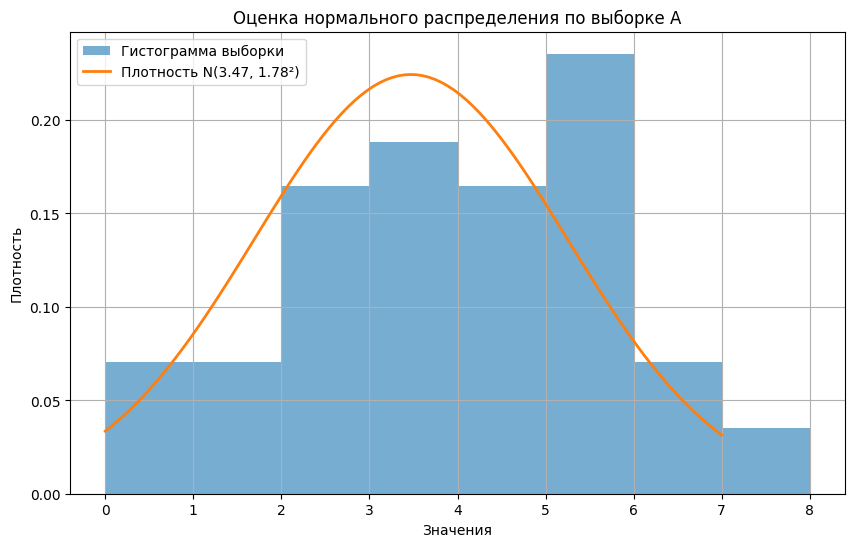

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import display, Math

# Данные выборки
numbers = [
    4, 5, 3, 4, 5, 2, 3, 3, 3, 4, 4, 5, 3, 1, 4, 1, 4, 5, 5, 1, 2, 5, 5,
	5, 3, 4, 3, 5, 5, 4, 0, 2, 6, 7, 1, 3, 2, 2, 4, 2, 3, 3, 6, 0, 6, 2,
	4, 3, 6, 1, 5, 4, 4, 4, 5, 2, 4, 5, 3, 5, 5, 6, 2, 2, 3, 2, 2, 5, 2,
	5, 5, 0, 7, 1, 0, 0, 0, 5, 3, 2, 7, 6, 3, 5, 3 ]

data = np.array(numbers)

# Метод моментов
mu_mom = np.mean(data)
sigma_mom = np.std(data, ddof=1)

# Метод максимального правдоподобия
mu_mle = np.mean(data)
sigma_mle = np.std(data, ddof=0)


# Вывод формул и подписей
display(Math(r"\textbf{Оценки параметров нормального распределения:}"))

display(Math(r"\text{Метод моментов:}"))
display(Math(r"\text{Оценка математического ожидания:} \quad \hat{\mu}_{\text{mom}} = \overline{x} = %.3f" % mu_mom))
display(Math(r"\text{Оценка стандартного отклонения:} \quad \hat{\sigma}_{\text{mom}} = \sqrt{\frac{1}{n}\sum (x_i - \overline{x})^2} = %.3f" % sigma_mom))

display(Math(r"\text{Метод максимального правдоподобия:}"))
display(Math(r"\text{Оценка математического ожидания:} \quad \hat{\mu}_{\text{MLE}} = \overline{x} = %.3f" % mu_mle))
display(Math(r"\text{Оценка стандартного отклонения:} \quad \hat{\sigma}_{\text{MLE}} = \sqrt{\frac{1}{n}\sum (x_i - \overline{x})^2} = %.3f" % sigma_mle))

# Визуализация
x = np.linspace(min(data), max(data), 100)
pdf = norm.pdf(x, mu_mle, sigma_mle)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=range(min(data), max(data)+2), density=True, alpha=0.6, label='Гистограмма выборки')
plt.plot(x, pdf, label='Плотность N(%.2f, %.2f²)' % (mu_mle, sigma_mle), linewidth=2)
plt.title('Оценка нормального распределения по выборке A')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.grid(True)
plt.legend()
plt.show()


2. Вычислить теоретические частоты, используя формулы для вычисления
вероятностей выбранных дискретных распределений)

Интервал            | Эмпирическая частота | Теоретическая частота (норм)
------------------------------------------------------------
[0.00, 1.00)         |            6            |            4.84            
[1.00, 2.00)         |            6            |            10.35           
[2.00, 3.00)         |           14            |            16.27           
[3.00, 4.00)         |           16            |            18.81           
[4.00, 5.00)         |           14            |            15.98           
[5.00, 6.00)         |           20            |            9.98            
[6.00, 7.00)         |            9            |            4.58            


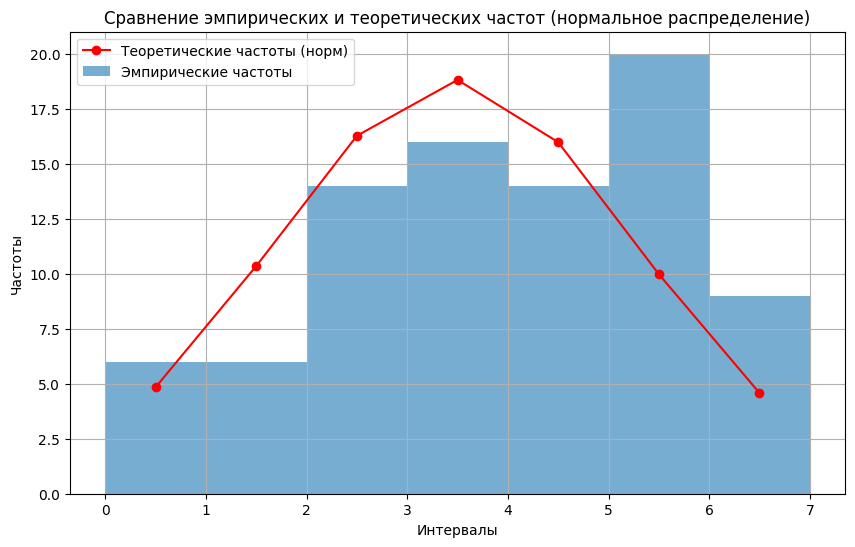

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Данные выборки
data = np.array([
    4, 5, 3, 4, 5, 2, 3, 3, 3, 4, 4, 5, 3, 1, 4, 1, 4, 5, 5, 1, 2, 5, 5,
	5, 3, 4, 3, 5, 5, 4, 0, 2, 6, 7, 1, 3, 2, 2, 4, 2, 3, 3, 6, 0, 6, 2,
	4, 3, 6, 1, 5, 4, 4, 4, 5, 2, 4, 5, 3, 5, 5, 6, 2, 2, 3, 2, 2, 5, 2,
	5, 5, 0, 7, 1, 0, 0, 0, 5, 3, 2, 7, 6, 3, 5, 3 ])

n = len(data)
mean = np.mean(data)
std = np.std(data, ddof=0)

# Определим интервалы по правилу Стерджесса
num_bins = int(1 + 3.322 * np.log10(n))
hist, bin_edges = np.histogram(data, bins=num_bins)

# Вычисляем теоретические вероятности и частоты
probs = [norm.cdf(bin_edges[i+1], mean, std) - norm.cdf(bin_edges[i], mean, std) for i in range(len(hist))]
theoretical_freqs = [round(p * n, 2) for p in probs]

# Вывод таблицы интервалов и частот
print("Интервал            | Эмпирическая частота | Теоретическая частота (норм)")
print("-" * 60)
for i in range(len(hist)):
    interval = f"[{bin_edges[i]:.2f}, {bin_edges[i+1]:.2f})"
    print(f"{interval:<20} | {hist[i]:^23} | {theoretical_freqs[i]:^27}")

# Визуализация: сравнение частот
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, hist, width=bin_edges[1]-bin_edges[0], alpha=0.6, label='Эмпирические частоты')
plt.plot(bin_centers, theoretical_freqs, 'o-', color='red', label='Теоретические частоты (норм)')
plt.xlabel("Интервалы")
plt.ylabel("Частоты")
plt.title("Сравнение эмпирических и теоретических частот (нормальное распределение)")
plt.grid(True)
plt.legend()
plt.show()


3. На одном графике построить полигоны исходного эмпирического
распределения и двух теоретических с использованием теоретических частот,
вычисленных в п.2

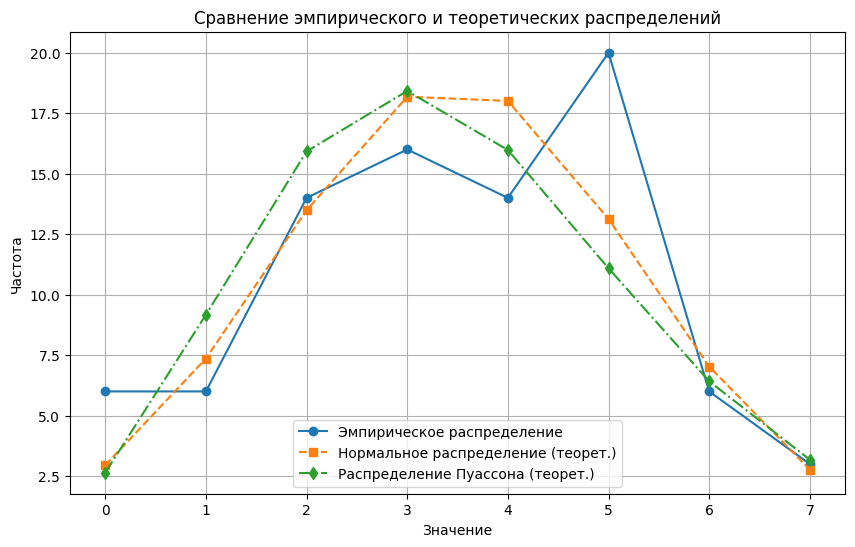

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson
from collections import Counter

# Данные выборки
data = np.array([    4, 5, 3, 4, 5, 2, 3, 3, 3, 4, 4, 5, 3, 1, 4, 1, 4, 5, 5, 1, 2, 5, 5,
	5, 3, 4, 3, 5, 5, 4, 0, 2, 6, 7, 1, 3, 2, 2, 4, 2, 3, 3, 6, 0, 6, 2,
	4, 3, 6, 1, 5, 4, 4, 4, 5, 2, 4, 5, 3, 5, 5, 6, 2, 2, 3, 2, 2, 5, 2,
	5, 5, 0, 7, 1, 0, 0, 0, 5, 3, 2, 7, 6, 3, 5, 3 ])

n = len(data)
mean = np.mean(data)
std = np.std(data, ddof=0)
lambda_poisson = mean

# Эмпирические частоты
emp_counts = Counter(data)
x_vals = sorted(emp_counts.keys())
emp_freqs = [emp_counts[x] for x in x_vals]

# Теоретические частоты (нормальное распределение)
# Здесь мы считаем вероятность попасть в интервал шириной 1 вокруг значения x
norm_freqs = [round((norm.cdf(x+0.5, mean, std) - norm.cdf(x-0.5, mean, std)) * n, 2) for x in x_vals]

# Теоретические частоты (распределение Пуассона)
poisson_freqs = [round(poisson.pmf(x, lambda_poisson) * n, 2) for x in x_vals]

# Построение графика
plt.figure(figsize=(10, 6))

plt.plot(x_vals, emp_freqs, 'o-', label="Эмпирическое распределение")
plt.plot(x_vals, norm_freqs, 's--', label="Нормальное распределение (теорет.)")
plt.plot(x_vals, poisson_freqs, 'd-.', label="Распределение Пуассона (теорет.)")

plt.xlabel("Значение")
plt.ylabel("Частота")
plt.title("Сравнение эмпирического и теоретических распределений")
plt.grid(True)
plt.legend()
plt.show()


4. Построить 95% (асимптотические) доверительные интервалы для
параметров двух теоретических распределений с использованием ЗБЧ и
функционального преобразования

Напомним, как выглядит распределение Пуассона:
пусть задана последовательность случайных величин:
$$
X = \{0,1, 2, \dots, m, \dots \}
$$
с вероятностями:
$$
P(X = m) = \frac{a^m}{m!}e^{-a}, \quad m \in \{0, 1, 2, \dots\}
$$
данная случайная величина имеет **распределение Пуассона**.

Используем метод максимального правдоподобия для нахождения точечной оценки параметра $\theta = a$.
Составим функцию правдоподобия:
$$
L(x, \theta) = \frac{\theta^{x_1}}{x_1!}e^{-\theta} \cdot  \frac{\theta^{x_2}}{x_2!}e^{-\theta} \cdot \dots \cdot \frac{\theta^{x_n}}{x_n!}e^{-\theta}
$$
Вынесем в произведении за скобки $e^{-\theta}$:
$$
L(x, \theta) = e^{-n \theta} \cdot (\frac{\theta^{x_1 + x_2 + \dots + x_n}}{x_1!x_2!\cdot\dots\cdot x_n!})
$$
Пусть $x_1 + x_2 + \dots + x_n = S, \quad x_1! \cdot x_2! \cdot \dots \cdot x_n!$:
$$
L(x, \theta) = e^{-n\theta} \cdot \frac{\theta^S}{W}
$$
Заменим $L(x, \theta)$ на $\ln L(x, \theta)$:
$$
\ln L(x,\theta) = \ln(e)^{-n\theta} + \ln(\theta)^S - \ln(W)
$$
Применим свойства логарифма:
$$
\ln L(x, \theta) = -n \theta + S \ln(\theta) - \ln(W)
$$
Найдём производную от $\ln L(x, \theta)$:
$$
(\ln L(x, \theta))'_{\theta} = -n + S \cdot \frac{1}{\theta}
$$
Приравняем производную к 0:
$$
\begin{gathered}
-n+\frac{S}{\theta} = 0 \\
\frac{S}{\theta} = n \\
\theta = \frac{S}{n}
\end{gathered}
$$
Подставим $S = x_1 + x_2 + \dots + x_n$:
$$
\theta = \frac{x_1 + x_2 + \dots + x_n}{n}
$$
Тогда получаем, что:
$$
\hat \theta = \overline X
$$

In [ ]:
import numpy as np
from scipy.stats import norm
from IPython.display import display, Math
from math import sqrt

# Данные
data = np.array([
    4, 5, 3, 4, 5, 2, 3, 3, 3, 4, 4, 5, 3, 1, 4, 1, 4, 5, 5, 1, 2, 5, 5,
	5, 3, 4, 3, 5, 5, 4, 0, 2, 6, 7, 1, 3, 2, 2, 4, 2, 3, 3, 6, 0, 6, 2,
	4, 3, 6, 1, 5, 4, 4, 4, 5, 2, 4, 5, 3, 5, 5, 6, 2, 2, 3, 2, 2, 5, 2,
	5, 5, 0, 7, 1, 0, 0, 0, 5, 3, 2, 7, 6, 3, 5, 3
])

n = len(data)
mean = np.mean(data)
std = np.std(data, ddof=0)
alpha = 0.05
z = norm.ppf(1 - alpha / 2)

#найдём оцененный параметр
overline_x = 0
for i in range (len(data)):
  overline_x += data[i]
overline_x = overline_x / len(data)
print(f"Среднее выборочное равно: {overline_x}")

tau = 1.96
n = len(data)
left_theta, right_theta = ((-tau/sqrt(n) + sqrt((tau**2)/(n)+4*overline_x))/(2))**2, ((tau/sqrt(n) + sqrt((tau**2)/(n) +4*overline_x))/(2))**2
print(f"Доверительные интервалы равны: {left_theta}, {right_theta}")
# --- Нормальное распределение ---
# Интервал для μ
mu_ci = (mean - z * std / np.sqrt(n), mean + z * std / np.sqrt(n))

# Интервал для σ через дельта-метод (sqrt из дисперсии)
# σ_hat ≈ N(σ, σ²/(2n))
sigma_ci = (std * (1 - z / np.sqrt(2 * n)), std * (1 + z / np.sqrt(2 * n)))

# --- Пуассоновское распределение ---
lambda_hat = mean
lambda_ci = (lambda_hat - z * np.sqrt(lambda_hat / n), lambda_hat + z * np.sqrt(lambda_hat / n))

# --- Вывод с пояснениями ---
#display(Math(r"\textbf{95\% Доверительные интервалы (асимптотические)}"))

display(Math(r"\text{Для нормального распределения:}"))
display(Math(r"\text{Математическое ожидание } \mu \in \left[ %.3f,\ %.3f \right]" % mu_ci))
display(Math(r"\text{(Оценка основана на ЦПТ: } \overline{X} \sim N(\mu, \sigma^2 / n)\text{)}"))

display(Math(r"\text{Стандартное отклонение } \sigma \in \left[ %.3f,\ %.3f \right]" % sigma_ci))
display(Math(r"\text{(По дельта-методу: } \hat{\sigma} \sim N(\sigma, \sigma^2/(2n))\text{)}"))

display(Math(r"\text{Для распределения Пуассона:}"))
display(Math(r"\text{Интенсивность } \lambda \in \left[ %.3f,\ %.3f \right]" % lambda_ci))
display(Math(r"\text{(Так как Var(X)=E(X)=}\lambda, \text{ применяется } \sqrt{\lambda/n})"))


Среднее выборочное равно: 3.4705882352941178
Доверительные интервалы равны: 3.09649341997439, 3.8898783447314926


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Теоретические числовые характеристики распределений


Нормальное распределение

\begin{aligned}
&\text{Математическое ожидание:} &&\mathbb{E}[X] = \mu \\
&\text{Дисперсия:} &&\mathrm{Var}(X) = \sigma^2 \\
&\text{Мода:} &&\text{Mode}(X) = \mu \\
&\text{Медиана:} &&\text{Med}(X) = \mu \\
&\text{Коэффициент асимметрии:} &&\gamma_1 = 0 \\
&\text{Коэффициент эксцесса:} &&\gamma_2 = 0
\end{aligned}



Распределение Пуассона

\begin{aligned}
&\text{Математическое ожидание:} &&\mathbb{E}[X] = \lambda \\
&\text{Дисперсия:} &&\mathrm{Var}(X) = \lambda \\
&\text{Мода:} &&\text{Mode}(X) =
\begin{cases}
\lfloor \lambda \rfloor, & \lambda \notin \mathbb{Z} \\
\lambda - 1 \text{ и } \lambda, & \lambda \in \mathbb{Z}
\end{cases} \\
&\text{Медиана (приближённо):} &&\text{Med}(X) \approx \left\lfloor \lambda + \frac{1}{3} - \frac{0.02}{\lambda} \right\rfloor \\
&\text{Коэффициент асимметрии:} &&\gamma_1 = \frac{1}{\sqrt{\lambda}} \\
&\text{Коэффициент эксцесса:} &&\gamma_2 = \frac{1}{\lambda}
\end{aligned}


5. Записать числовые характеристики теоретических распределений (мода,
медиана, математическое ожидание, дисперсию, коэффициенты асимметрии и
эксцесса), воспользовавшись справочными материалами из курса теории
вероятностей, сравнить с соответствующими эмпирическими моментами,
вычисленными по выборке в лабораторной работе № 1

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis, mode

# Выборка
data = np.array([
    4, 5, 3, 4, 5, 2, 3, 3, 3, 4, 4, 5, 3, 1, 4, 1, 4, 5, 5, 1, 2, 5, 5,
	5, 3, 4, 3, 5, 5, 4, 0, 2, 6, 7, 1, 3, 2, 2, 4, 2, 3, 3, 6, 0, 6, 2,
	4, 3, 6, 1, 5, 4, 4, 4, 5, 2, 4, 5, 3, 5, 5, 6, 2, 2, 3, 2, 2, 5, 2,
	5, 5, 0, 7, 1, 0, 0, 0, 5, 3, 2, 7, 6, 3, 5, 3
])

n = len(data)
mean = np.mean(data)
var = np.var(data, ddof=0)
std = np.std(data, ddof=0)

# --- Теоретические параметры ---

# Нормальное распределение (N(mu, sigma^2))
# Унифицированные названия характеристик
normal_theory = {
    "Матем. ожидание": mean,
    "Дисперсия": var,
    "Мода": mean,
    "Медиана": mean,
    "Асимметрия": 0,
    "Эксцесс": 0
}

poisson_theory = {
    "Матем. ожидание": lambda_poisson,
    "Дисперсия": lambda_poisson,
    "Мода": np.floor(lambda_poisson) if lambda_poisson != int(lambda_poisson) else np.array([lambda_poisson - 1, lambda_poisson]),
    "Медиана": np.floor(lambda_poisson + 1/3 - 0.02 / lambda_poisson),
    "Асимметрия": round(1 / np.sqrt(lambda_poisson), 4),
    "Эксцесс": round(1 / lambda_poisson, 4)
}

# --- Эмпирические значения из выборки ---
empirical = {
    "Матем. ожидание": round(mean, 4),
    "Дисперсия": round(var, 4),
    "Мода": mode(data, keepdims=False).mode,
    "Медиана": round(np.median(data), 4),
    "Асимметрия": round(skew(data), 4),
    "Эксцесс": round(kurtosis(data, fisher=True), 4)
}

# --- Печать сравнения ---
print(f"{'Характеристика':<22} | {'Эмпирическое':^20} | {'Нормальное (теор.)':^22} | {'Пуассон (теор.)':^22}")
print("-" * 90)
for key in empirical.keys():
    emp_val = empirical[key]
    norm_val = normal_theory[key]
    pois_val = poisson_theory[key]
    print(f"{key:<22} | {str(emp_val):^20} | {str(norm_val):^22} | {str(pois_val):^22}")


Характеристика         |     Эмпирическое     |   Нормальное (теор.)   |    Пуассон (теор.)    
------------------------------------------------------------------------------------------
Матем. ожидание        |        3.4706        |   3.4705882352941178   |   3.4705882352941178  
Дисперсия              |        3.1668        |   3.166782006920415    |   3.4705882352941178  
Мода                   |          5           |   3.4705882352941178   |          3.0          
Медиана                |         4.0          |   3.4705882352941178   |          3.0          
Асимметрия             |       -0.1772        |           0            |         0.5368        
Эксцесс                |       -0.6749        |           0            |         0.2881        
